In [131]:
import torch.nn as nn
import torch

import timm
import matplotlib.pyplot as plt
import numpy as np
from timm import create_model
import os
import sys

%matplotlib inline
%load_ext autoreload
%autoreload 2

# imports files from src/ like the following
# import src.MLPValueAnalyzer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
DATA_PATH = 'C:/Users/Anwender/Pictures/ImageNet'
TIMM_MODEL_DESCRIPTOR = 'vit_base_patch16_224'
HUGGINGFACE_MODEL_DESCRIPTOR = 'google/vit-base-patch16-224-in21k'

from src.datasets.ImageNet import ImageNetDataset
from src.utils.transformation import transform_images
from src.utils.extraction import extract_computed_key_vectors, extract_value_vectors, extract_key_weights
from src.analyzers.top_stimulated_neurons import find_topk_stimulated_key_vectors
from src.utils.model import embedding_projection
from src.analyzers.mlp_value_analyzer import most_predictive_ind_for_class

import cv2


In [133]:

dataset = ImageNetDataset(DATA_PATH)
model = create_model(TIMM_MODEL_DESCRIPTOR, pretrained=True).to(device).eval()
imgs = transform_images([img['img'] for img in dataset.get_images_from_imgnet_id('n01440764')],
                        HUGGINGFACE_MODEL_DESCRIPTOR)

imgs = torch.stack(imgs)

stacked_imgs = torch

In [134]:
values = extract_value_vectors(model)
projected_values = embedding_projection(model, values)

indices = most_predictive_ind_for_class(projected_values)

# Generated Class Key Neuron Activation

In [135]:
indices.shape

torch.Size([3, 1000])

In [136]:
blocks_activation = indices[0,:].bincount()

In [137]:
indices[2,indices[0,:] == 11]

tensor([ 31,  40,  43,  44,  46,  55,  58,  59,  68,  70,  71,  92,  93, 102,
        108, 124, 125, 168, 171, 174, 175, 185, 195, 199, 226, 245, 252, 262,
        268, 274, 279, 280, 298, 300, 302, 304, 305, 309, 318, 323, 324, 325,
        326, 329, 330, 334, 357, 370, 371, 373, 376, 392, 415, 449, 451, 457,
        463, 478, 492, 496, 509, 529, 552, 562, 580, 582, 583, 610, 647, 675,
        680, 700, 706, 710, 731, 738, 739, 761, 769, 788, 793, 798, 804, 825,
        828, 830, 860, 865, 868, 912, 918, 919, 924, 934, 946, 965, 976, 977,
        985, 989, 991, 993, 995, 996])

In [138]:
indices[2,indices[0,:] == 10]

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  32,  33,  34,  35,  36,  37,  38,  39,  41,  42,  45,
         47,  48,  49,  50,  51,  52,  54,  56,  57,  60,  61,  62,  63,  64,
         66,  67,  69,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  90,  91,  94,  95,  96,  97,  98,
         99, 100, 101, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 172, 173, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192,
        193, 194, 196, 197, 198, 200, 201, 202, 203, 204, 206, 2

In [139]:
indices[2,indices[0,:] == 9]

tensor([ 53,  65, 114, 221, 313, 417, 501, 538, 684, 692, 779, 839, 863, 970,
        971])

In [140]:
indices[2,indices[0,:] == 8]

tensor([411, 729, 735, 901])

In [141]:
indices[2,indices[0,:] == 7]

tensor([205])

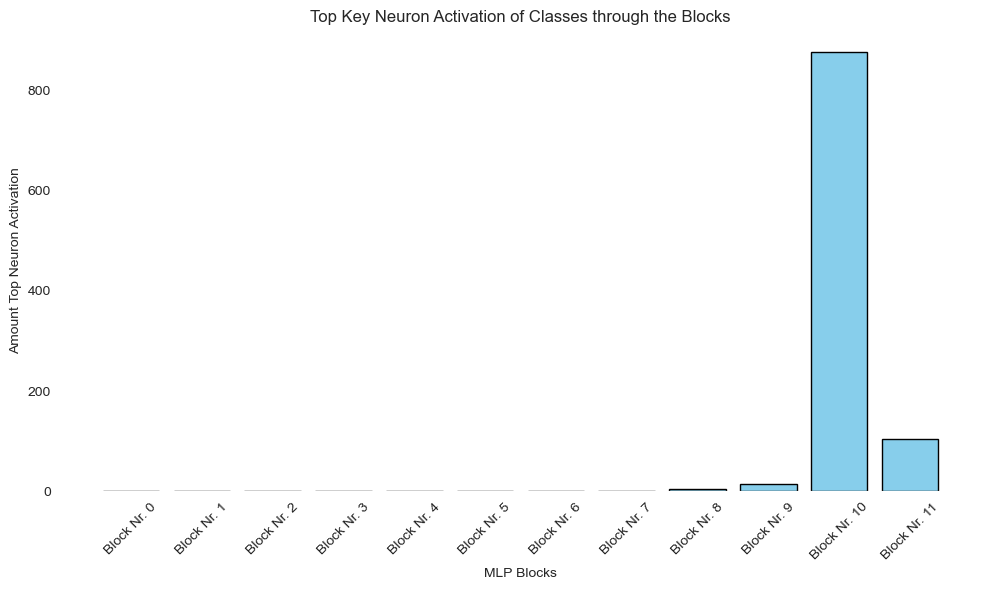

In [142]:


bins = torch.arange(12)

# Plotting the histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(bins.numpy(), blocks_activation.numpy(), color='skyblue', edgecolor='black')
ax.set_xlabel('MLP Blocks')
ax.set_ylabel('Amount Top Neuron Activation')
ax.set_title('Top Key Neuron Activation of Classes through the Blocks')

# Set x-ticks and labels
xtick_labels = [f"Block Nr. {i}" for i in bins.numpy()]
ax.set_xticks(bins.numpy())
ax.set_xticklabels(xtick_labels, rotation=45)

# Explicitly set background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to make room for the rotated x-tick labels
plt.savefig('Top1_Block_Distribution.pdf')
plt.show()

# Plot Blockwise Key Neuron Activation

In [143]:
imgs.shape

torch.Size([50, 1, 3, 224, 224])

In [144]:
first_img = imgs[0]

In [145]:
extract_value_vectors(model)[0].shape

torch.Size([3072, 768])

In [146]:
extract_key_weights(model)[0].shape

torch.Size([768, 3072])

In [147]:
imgs = imgs.squeeze(1)

In [148]:
computed_keys = extract_computed_key_vectors(model, imgs, device)

In [149]:
computed_keys.shape

torch.Size([12, 50, 197, 3072])

In [150]:
avg_keys = computed_keys.mean(dim=(1, 2))
avg_keys.shape

torch.Size([12, 3072])

In [210]:
mean_values = avg_keys.mean(dim=1, keepdim=True)  # Shape: [12, 1]
normalized_data = avg_keys #- mean_values

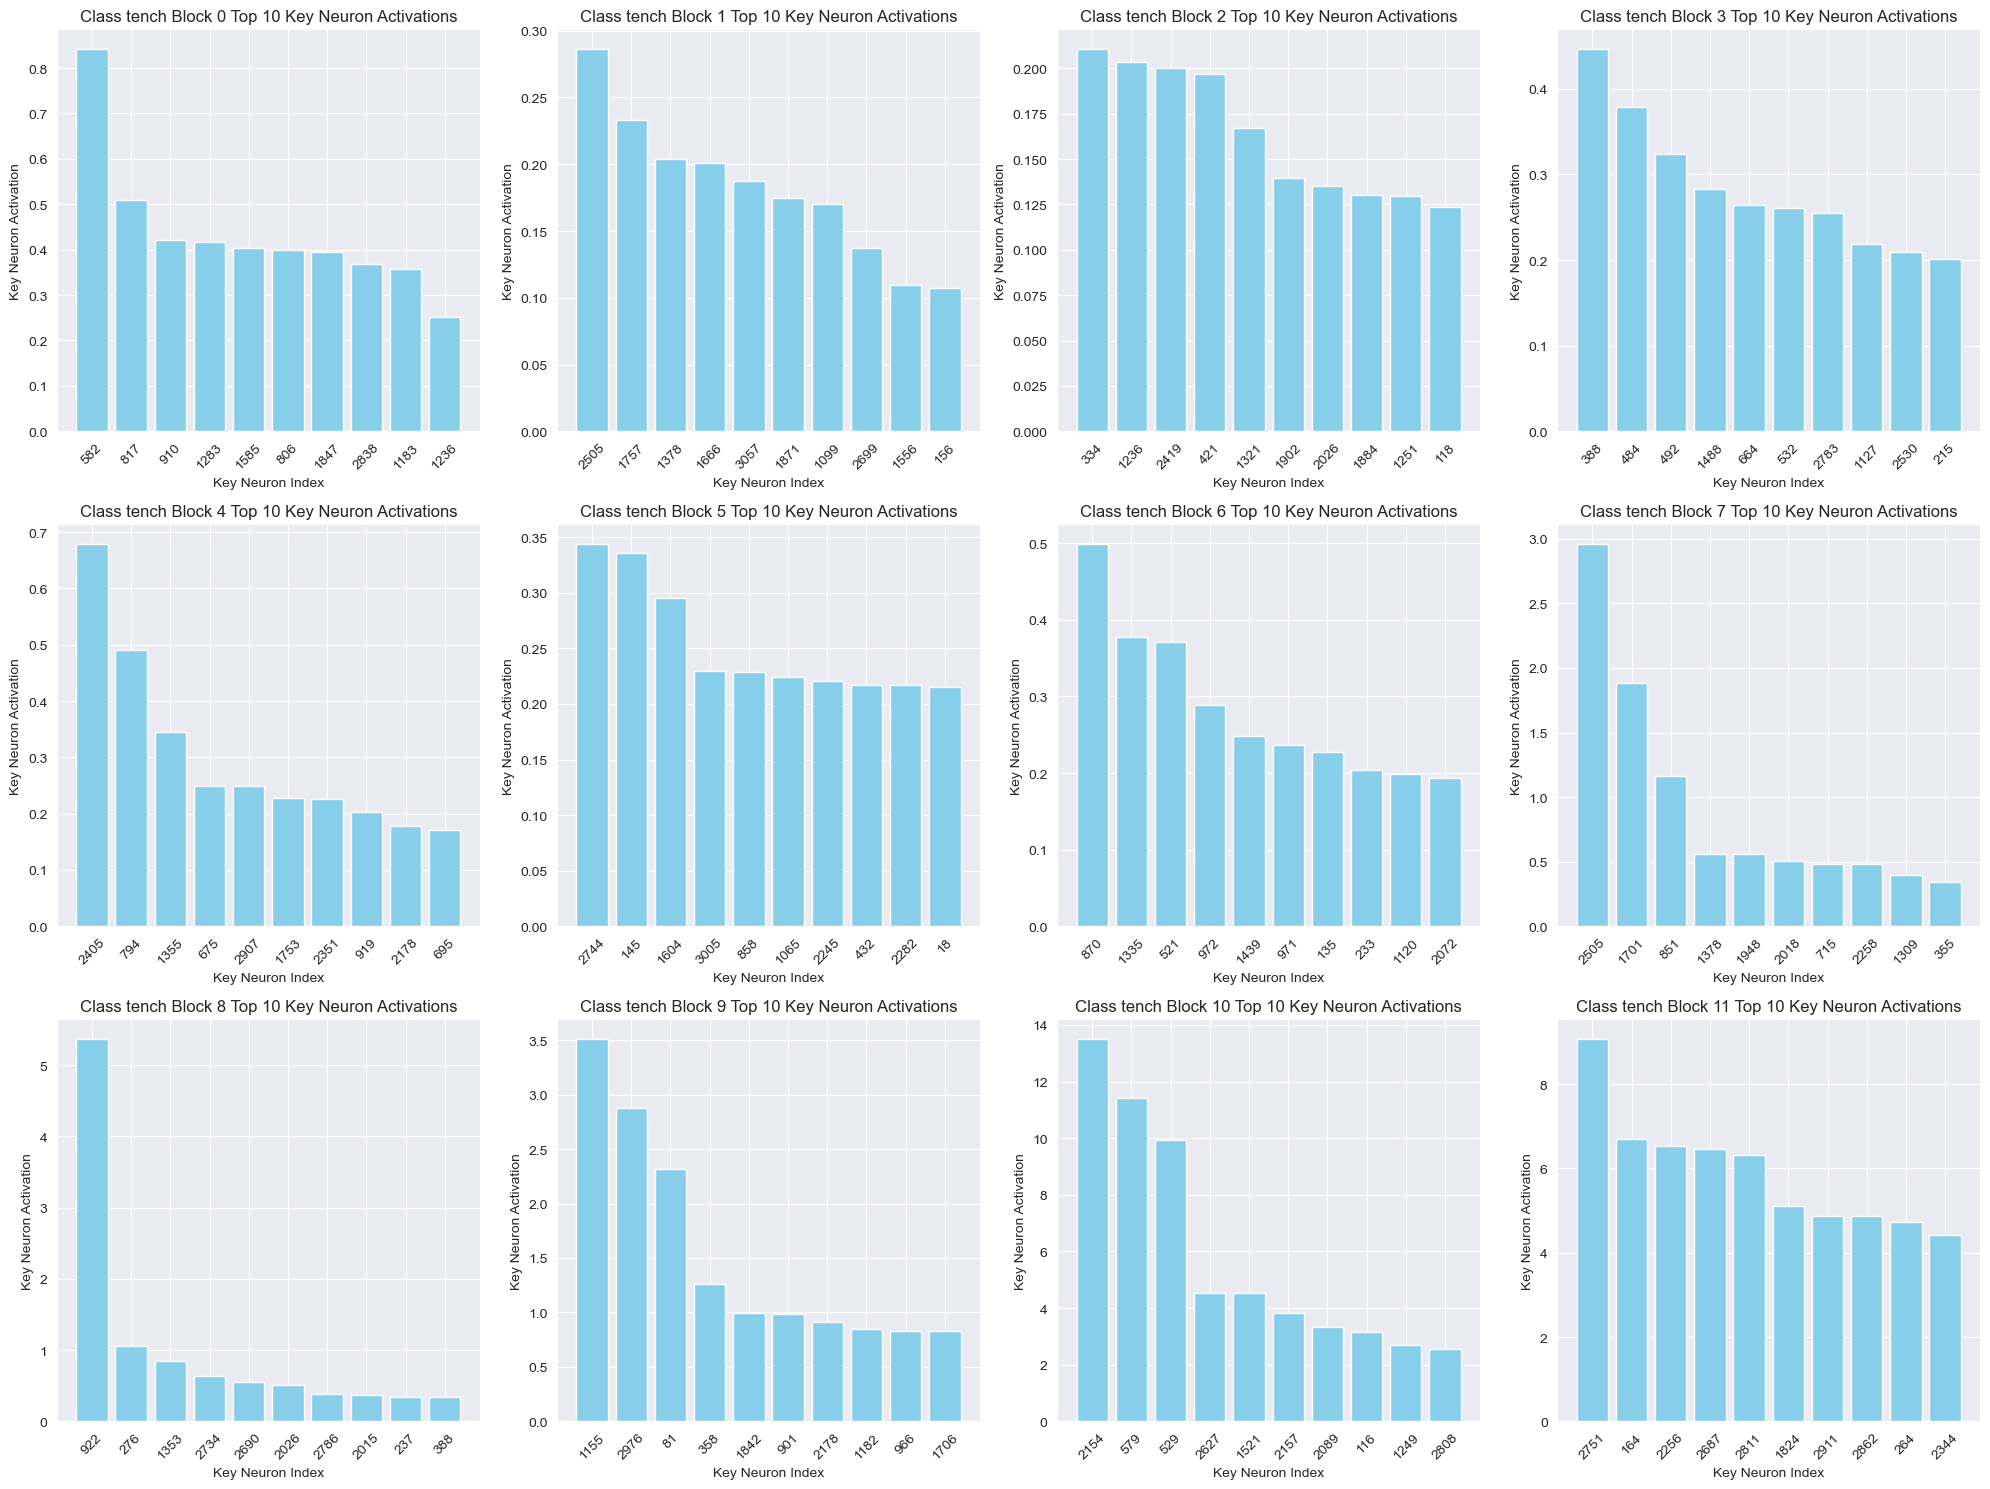

In [211]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # Create a grid of subplots
axes = axes.flatten()  # Flatten the 2D grid into 1D for easier indexing

for i in range(12):
    layer_data = normalized_data[i]
    top_values, top_indices = torch.topk(layer_data, 10)  # Get top 10 values and their indices
    
    x_positions = range(1, 11)
    
    # Plotting
    axes[i].bar(x_positions, top_values.detach().numpy(), color='skyblue')
    axes[i].set_title(f'Class tench Block {i} Top 10 Key Neuron Activations')
    axes[i].set_xlabel('Key Neuron Index')
    axes[i].set_ylabel('Key Neuron Activation')
    
    # Improving readability of the plot
    axes[i].set_xticks(x_positions)
    axes[i].set_xticklabels(top_indices.detach().numpy(), rotation=45)
    axes[i].grid(True)

plt.tight_layout()
plt.savefig('top10_keys_class_block.pdf')
plt.show()

# Blockwise Image Key Neuron Distances

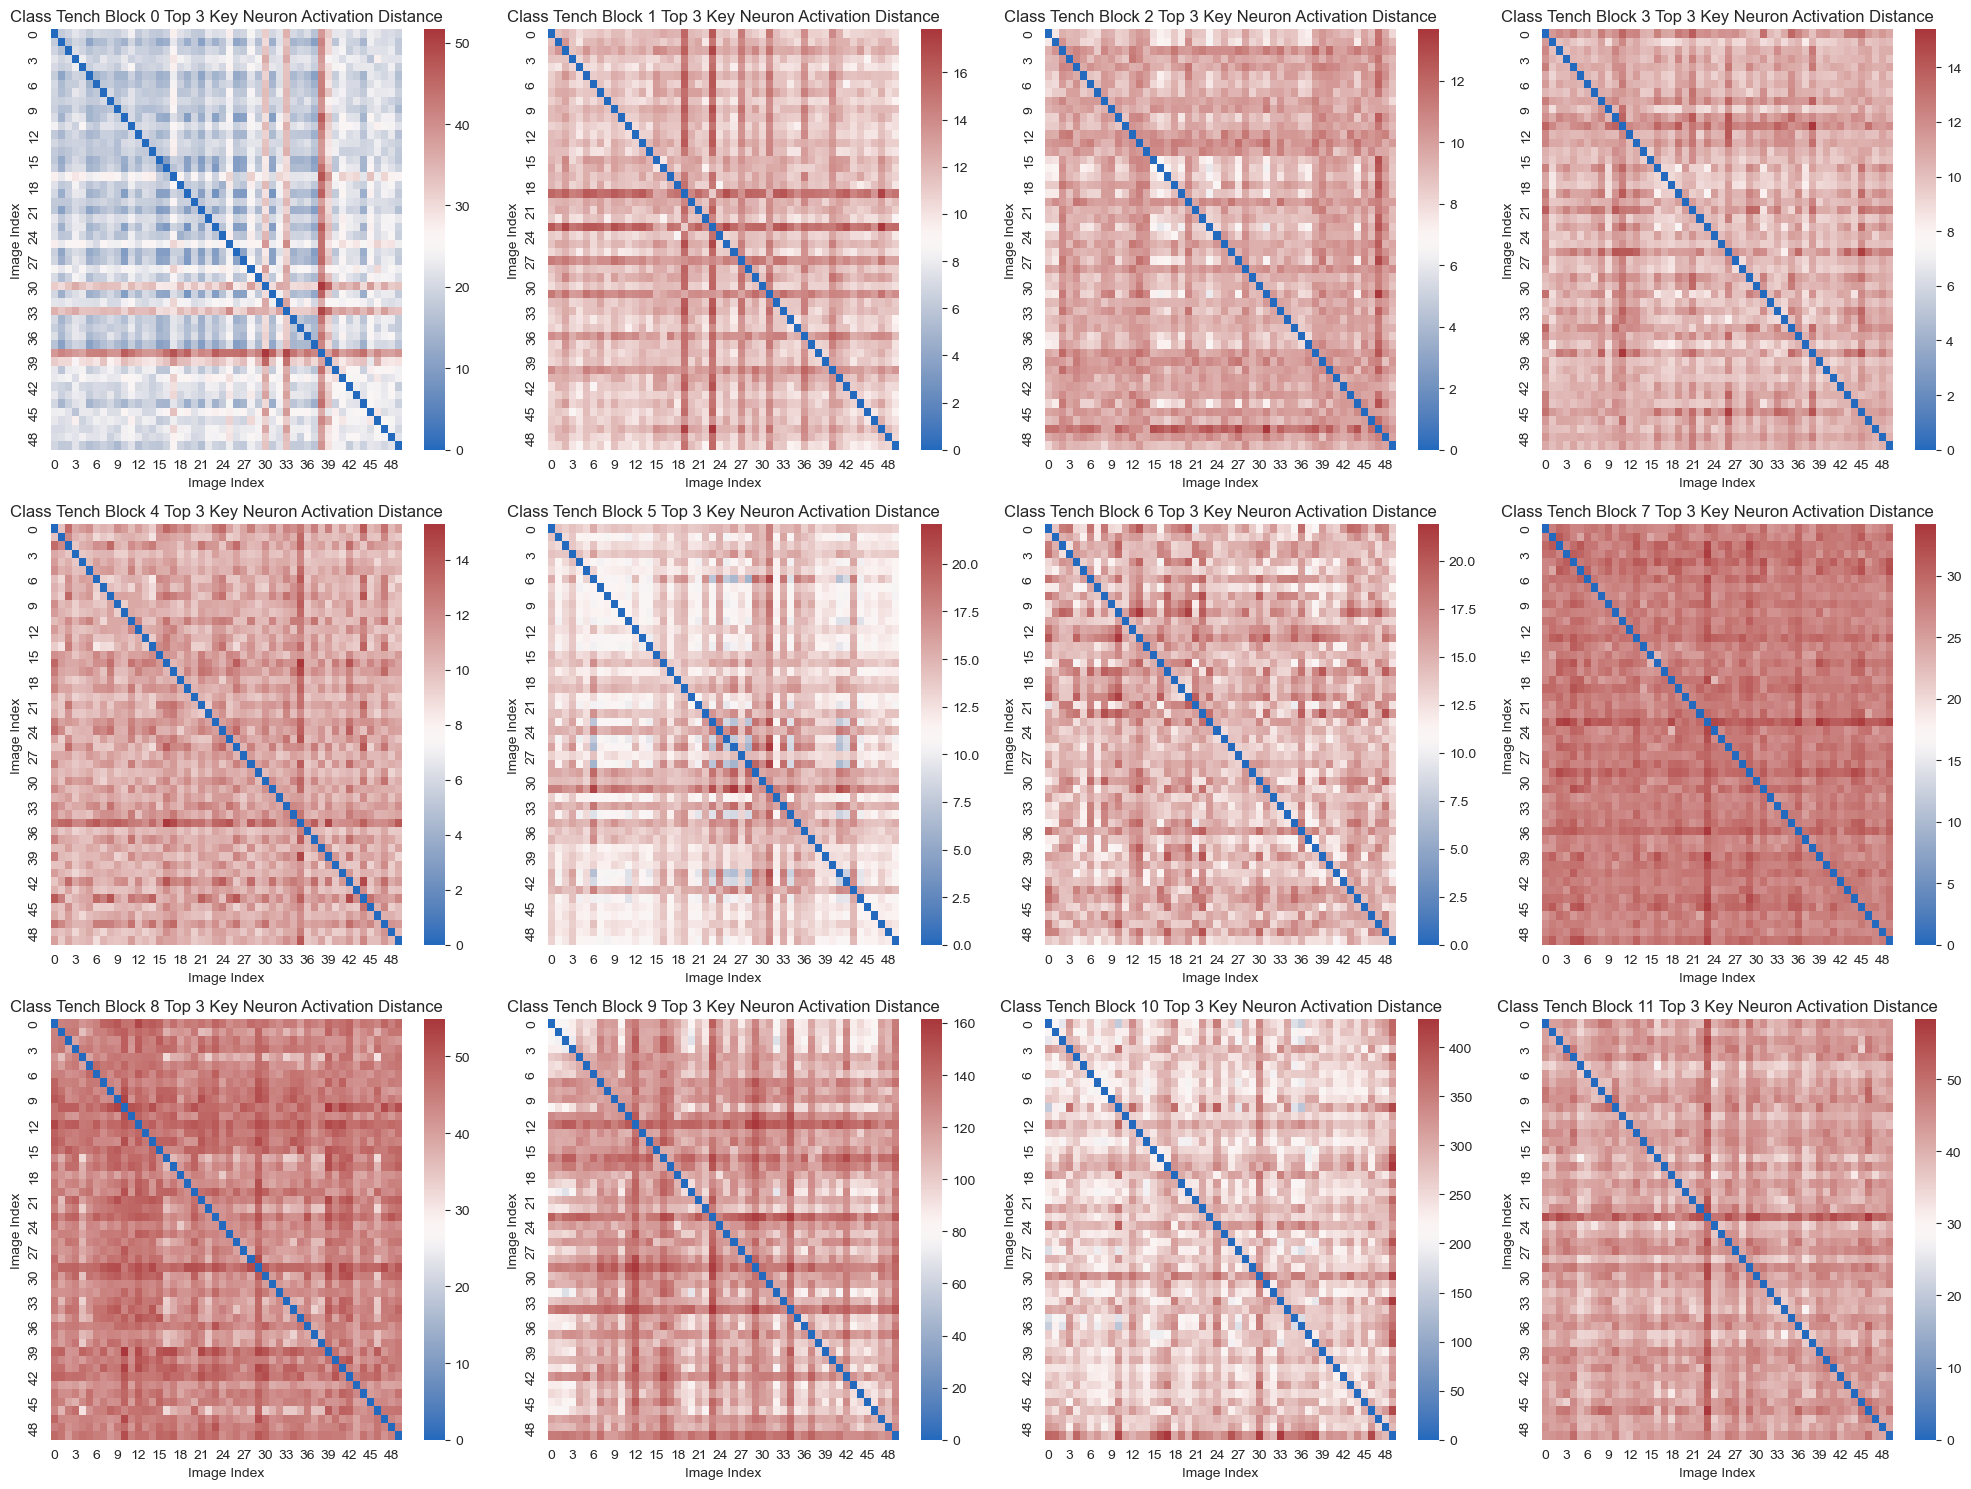

In [209]:
import seaborn as sns
k = 3

def plot_top_k_activated_features(computed_keys, k):
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # Create a grid of subplots for the 12 blocks
    axes = axes.flatten()  # Flatten the 2D grid into 1D for easier indexing

    for block_index in range(12):
        block = computed_keys[block_index]  # Shape: [50, 197, 3072]
        
        # Compute the mean across the 50 and 197 dimensions to get the average activation for each of the 3072 features
        avg_activation = block.mean(dim=(0, 1))  # Shape: [3072]
        
        # Find the indices of the top k activations
        _, top_k_indices = torch.topk(avg_activation, k)
        
        # Extract the top k activated features for all elements
        top_k_features = block[:, :, top_k_indices]  # Shape: [50, 197, k]
        
        # Compute L2 distance for the top k features across the 50 dimension
        # We need to reshape the tensor to treat each of the 50 elements as a vector of length [197*k]
        vectors = top_k_features.view(50, -1)
        dist_matrix = torch.cdist(vectors, vectors, p=2)  # Shape: [50, 50]
        
        # Plotting the distance matrix
        ax = axes[block_index]
        sns.heatmap(dist_matrix.detach().numpy(), ax=ax, cmap="vlag")
        ax.set_title(f'Class Tench Block {block_index} Top {k} Key Neuron Activation Distance')
        ax.set_xlabel('Image Index')
        ax.set_ylabel('Image Index')

    plt.tight_layout()
    plt.savefig('top3_pairwise_L2_Images.pdf')
    plt.show()

# Call the function with your tensor and the value of k
plot_top_k_activated_features(computed_keys, k)

# Classwise Blockwise L2 Distances

In [214]:
def plot_blockwise_top_k_l2_distances(dataset, model, device, classes, class_names, k, blocksize=12):
    """
    Plot blockwise L2 distances between specified classes based on the top k activated features,
    with each subplot representing a block.
    
    Parameters:
    - dataset: Dataset object with a method to get images by ImageNet ID.
    - model: Pre-trained model to compute feature vectors.
    - device: Device ('cuda' or 'cpu') to perform computations.
    - classes: List of class IDs to analyze.
    - class_names: List of class names corresponding to class IDs.
    - k: Number of top activated features to consider for L2 distance calculation.
    - blocksize: The fixed size of blocks to be considered, should be compatible with the subplot grid.
    """
    # Initialize tensor to hold top k features for each block and class
    top_k_features_all_blocks = torch.zeros((len(classes), blocksize, k), dtype=torch.float32, device=device)

    for i, class_id in enumerate(classes):
        imgs = [img['img'] for img in dataset.get_images_from_imgnet_id(class_id)]
        transformed_imgs = transform_images(imgs, HUGGINGFACE_MODEL_DESCRIPTOR)
        computed_keys = extract_computed_key_vectors(model, transformed_imgs, device)
        
        for block_index in range(blocksize):
            block = computed_keys[block_index]  # Shape: [amt_images, 197, 3072]
            avg_activation = block.mean(dim=1)  # Shape: [amt_images, 3072], average over 197 dimension
            top_values, _ = torch.topk(avg_activation, k, dim=1)  # Shape: [amt_images, k]
            top_k_avg = top_values.mean(dim=0)  # Shape: [k], average over images
            top_k_features_all_blocks[i, block_index, :] = top_k_avg

    # Create a grid of subplots for the blocks
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    axes = axes.flatten()

    for block_index in range(blocksize):
        block_vectors = top_k_features_all_blocks[:, block_index, :]  # Shape: [amt_classes, k]
        dist_matrix = torch.cdist(block_vectors, block_vectors, p=2)

        sns.heatmap(dist_matrix.detach().numpy(), annot=True, cmap="vlag", ax=axes[block_index], xticklabels=class_names, yticklabels=class_names)
        axes[block_index].set_title(f'Block {block_index} Top {k} Features L2 Distances')

    plt.tight_layout()
    plt.savefig('top1_pairwise_L2.pdf')
    plt.show()

In [155]:
dataset = ImageNetDataset(DATA_PATH)

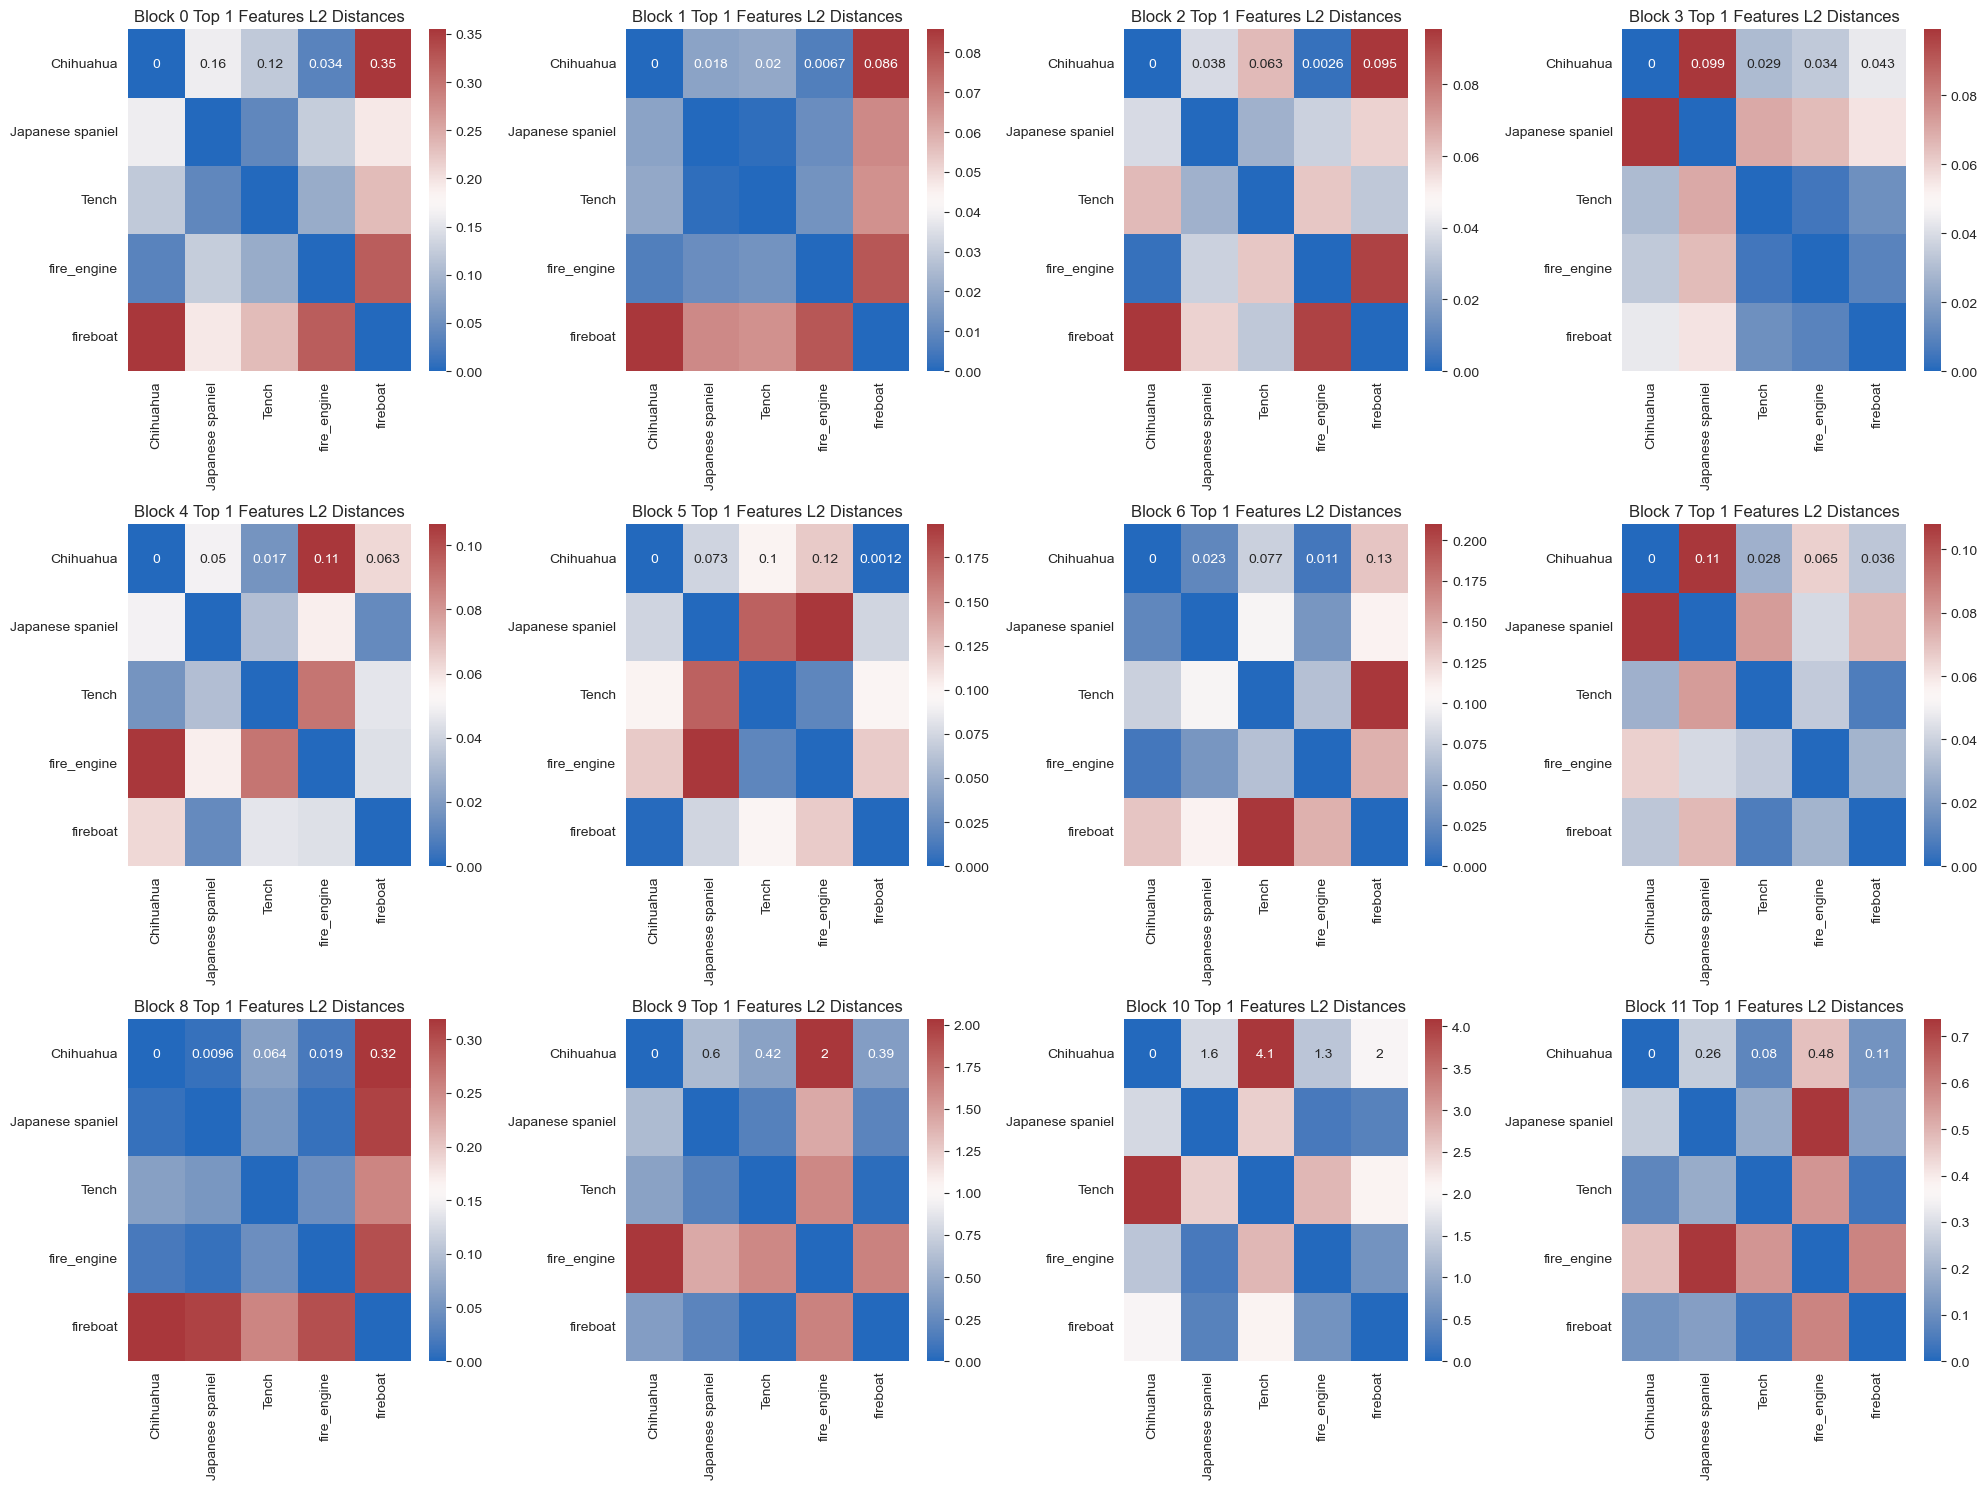

In [215]:
classes = ['n02085620', 'n02085782', 'n01440764', 'n03345487', 'n03344393']  # Replace with actual class IDs
class_names = ['Chihuahua', 'Japanese spaniel', 'Tench', 'fire_engine', 'fireboat']  # Replace with actual class names

plot_blockwise_top_k_l2_distances(dataset, model, device, classes, class_names, k=1)

In [157]:
first_img.shape

torch.Size([1, 3, 224, 224])

In [158]:
#12 blocks, 50 images, each image of 196 patches and 1 cls token with dimension 
computed_keys.shape

torch.Size([12, 50, 197, 3072])

In [159]:
first_img = first_img.unsqueeze(dim=0)

In [160]:

top1_key_vectors, top1_indices = find_topk_stimulated_key_vectors(model, k=1)
key_vector_of_interest = top1_key_vectors[:, 0]
#top 1, class 1

In [161]:
top1_key_vectors.shape
# Top 1 Key Vector for each of the 1000 Classes, with 768 image Embedding Dimension

torch.Size([1, 1000, 768])

In [162]:
key_vector_of_interest.shape

torch.Size([1, 768])

In [163]:
key_vector_of_interest[0].shape

torch.Size([768])

In [164]:
key_vectors_mean = torch.mean(key_vector_of_interest, 0)
#to be able and examine multiple top n key neurons for one class

In [165]:
key_vectors_mean.shape

torch.Size([768])

In [166]:
key_vectors_mean

tensor([ 1.2399e-02, -2.5974e-03, -1.9885e-03,  2.0616e-02, -1.8093e-02,
        -6.0574e-03,  2.5369e-02, -1.5766e-02, -2.5745e-02, -2.5780e-02,
         1.3672e-03,  1.7065e-02,  8.2117e-03,  2.6492e-02, -3.5880e-03,
         1.2576e-02, -4.0177e-03, -4.0207e-02,  1.2391e-02, -1.0954e-02,
        -4.3193e-02,  6.0931e-03,  4.0001e-02,  6.4904e-05, -2.6925e-03,
        -2.9742e-02,  2.0607e-02,  1.1047e-02, -7.5666e-03, -1.0302e-02,
         2.0750e-03, -1.3179e-02, -1.9971e-02,  2.9977e-02,  3.8045e-02,
         2.0049e-02, -2.4210e-02, -3.1169e-02,  2.6565e-02, -2.7495e-04,
        -1.9978e-02, -3.5727e-02, -3.7247e-02,  2.7057e-02, -3.0804e-02,
         3.5314e-02, -1.2195e-02,  2.1784e-02, -1.5823e-02, -4.7966e-02,
        -2.1787e-02, -8.0868e-03, -7.5672e-03,  2.5606e-02,  7.4183e-03,
         8.2890e-03, -1.4703e-02, -1.4812e-02,  1.9437e-02, -3.3468e-02,
         7.6119e-03, -2.9722e-02, -2.6136e-02,  1.3791e-03,  8.5809e-03,
        -3.7699e-02, -2.6412e-02,  1.7154e-02,  2.1

In [167]:
first_img.shape

torch.Size([1, 1, 3, 224, 224])

In [168]:
layer_types = ['mlp.fc2', 'mlp.fc1']
layers = [f'blocks.{b}.{lt}' for b in range(12) for lt in layer_types]

# Create Feature Extractor

In [169]:
from torchvision.models.feature_extraction import create_feature_extractor

extractor = create_feature_extractor(model, layers)

In [170]:
first_img[:,0].shape

torch.Size([1, 3, 224, 224])

In [171]:
first_img_out = extractor(first_img[:,0])

In [172]:
first_img_out.keys()

dict_keys(['blocks.0.mlp.fc1', 'blocks.0.mlp.fc2', 'blocks.1.mlp.fc1', 'blocks.1.mlp.fc2', 'blocks.2.mlp.fc1', 'blocks.2.mlp.fc2', 'blocks.3.mlp.fc1', 'blocks.3.mlp.fc2', 'blocks.4.mlp.fc1', 'blocks.4.mlp.fc2', 'blocks.5.mlp.fc1', 'blocks.5.mlp.fc2', 'blocks.6.mlp.fc1', 'blocks.6.mlp.fc2', 'blocks.7.mlp.fc1', 'blocks.7.mlp.fc2', 'blocks.8.mlp.fc1', 'blocks.8.mlp.fc2', 'blocks.9.mlp.fc1', 'blocks.9.mlp.fc2', 'blocks.10.mlp.fc1', 'blocks.10.mlp.fc2', 'blocks.11.mlp.fc1', 'blocks.11.mlp.fc2'])

In [173]:
#Value Vector of Block 1 for Image
first_img_out['blocks.10.mlp.fc2'].shape

torch.Size([1, 197, 768])

In [174]:
first_img_out['blocks.10.mlp.fc1'].shape

torch.Size([1, 197, 3072])

In [175]:

to_examine = first_img_out['blocks.10.mlp.fc2']

new_to_examine = to_examine[:, 1:, :]

print(new_to_examine.shape)

torch.Size([1, 196, 768])


In [176]:
most_influence_on_key_vector = new_to_examine @ key_vector_of_interest[0]

In [177]:
most_influence_on_key_vector.shape

torch.Size([1, 196])

In [178]:
new_to_examine.shape

torch.Size([1, 196, 768])

In [179]:
most_influence_on_key_vector.shape

torch.Size([1, 196])

# Apply Heatmap and Binary Masking

In [180]:
def apply_heatmap(mask, image):
    # Normalize mask and reshape
    mask = (mask - mask.min()) / (mask.max() - mask.min())
    mask = mask.reshape(1, 1, 14, 14).float()
    mask = torch.nn.functional.interpolate(mask, size=224, mode='bilinear')
    mask = torch.squeeze(mask).detach().numpy()

    # Create heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255

    # Process image
    im = np.transpose(image.detach().numpy(), (1, 2, 0))
    im = (im - im.min()) / (im.max() - im.min())

    # Apply heatmap to image
    vis = heatmap + np.float32(im)
    vis = vis / np.max(vis)
    vis = np.uint8(255 * vis)
    vis = cv2.cvtColor(np.array(vis), cv2.COLOR_RGB2BGR)

    return vis

def apply_binary_mask(mask, image, percentile=80):
    # Normalize mask and reshape
    mask = (mask - mask.min()) / (mask.max() - mask.min())
    mask = mask.reshape(1, 1, 14, 14).float()
    mask = torch.nn.functional.interpolate(mask, size=224, mode='bilinear')
    mask = torch.squeeze(mask).detach().numpy()

    # Determine the threshold and create binary mask
    threshold = np.percentile(mask, percentile)
    binary_mask = np.where(mask > threshold, 1, 0)

    # Process image
    im = np.transpose(image.detach().numpy(), (1, 2, 0))
    im = (im - im.min()) / (im.max() - im.min())

    # Apply binary mask to image
    masked_image = im * binary_mask[..., np.newaxis]

    return masked_image



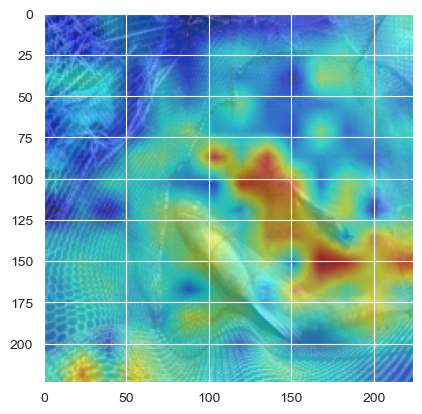

In [181]:
masked_image = apply_heatmap(most_influence_on_key_vector[0], imgs[0])

# Plot
plt.imshow(masked_image)
plt.show()

In [182]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [183]:
most_influence_on_key_vector[0].shape

torch.Size([196])

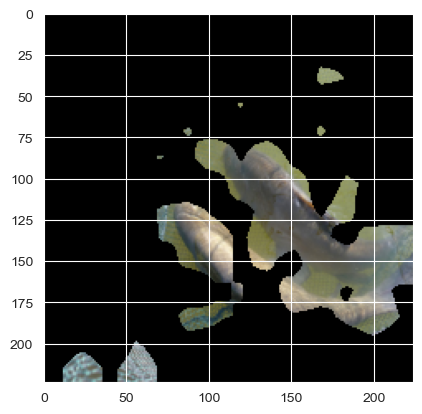

In [184]:


masked_image = apply_binary_mask(most_influence_on_key_vector[0], imgs[0])

# Plot
plt.imshow(masked_image)
plt.show()

In [185]:
from torchvision.models.feature_extraction import create_feature_extractor

def extract_features_from_layers(model, image, layer_types):
    """
    Extracts features from specified layers of a given model for a provided image.

    Parameters:
    model (torch.nn.Module): The neural network model from which to extract features.
    image (torch.Tensor): The input image tensor for feature extraction.
    layer_types (list): A list of strings representing the layer names from which to extract features.

    Returns:
    dict: A dictionary where keys are layer names and values are the extracted features.
    """

    # Generate the full layer names
    layers = [f'blocks.{b}.{lt}' for b in range(12) for lt in layer_types]

    # Create the feature extractor
    extractor = create_feature_extractor(model, layers)

    # Extract features from the image
    features = extractor(image)

    return features

In [186]:
features = extract_features_from_layers(model, first_img[:,0], layer_types)


In [187]:
to_examine = first_img_out['blocks.10.mlp.fc2']

new_to_examine = to_examine[:, 1:, :]


In [188]:
features.keys()

dict_keys(['blocks.0.mlp.fc1', 'blocks.0.mlp.fc2', 'blocks.1.mlp.fc1', 'blocks.1.mlp.fc2', 'blocks.2.mlp.fc1', 'blocks.2.mlp.fc2', 'blocks.3.mlp.fc1', 'blocks.3.mlp.fc2', 'blocks.4.mlp.fc1', 'blocks.4.mlp.fc2', 'blocks.5.mlp.fc1', 'blocks.5.mlp.fc2', 'blocks.6.mlp.fc1', 'blocks.6.mlp.fc2', 'blocks.7.mlp.fc1', 'blocks.7.mlp.fc2', 'blocks.8.mlp.fc1', 'blocks.8.mlp.fc2', 'blocks.9.mlp.fc1', 'blocks.9.mlp.fc2', 'blocks.10.mlp.fc1', 'blocks.10.mlp.fc2', 'blocks.11.mlp.fc1', 'blocks.11.mlp.fc2'])

In [189]:
most_influence_on_key_vector = new_to_examine @ key_vector_of_interest[0]

In [190]:
new_to_examine.shape

torch.Size([1, 196, 768])

In [191]:
key_vector_of_interest[0].shape

torch.Size([768])

In [192]:
feats = features.values()

In [193]:
features['blocks.0.mlp.fc2'].shape

torch.Size([1, 197, 768])

# Generate Heatmap and Binary Mask for Blocks

In [218]:
#Class to examine = c

c=0

topk_key_vectors, topk_indices = find_topk_stimulated_key_vectors(model, k=1)

In [219]:
topk_key_vectors_mean = torch.mean(topk_key_vectors, 0)

In [220]:
topk_key_vectors_mean.shape

torch.Size([1000, 768])

In [221]:
most_influence = new_to_examine @ topk_key_vectors_mean[c]

In [222]:
most_influence.shape

torch.Size([1, 196])

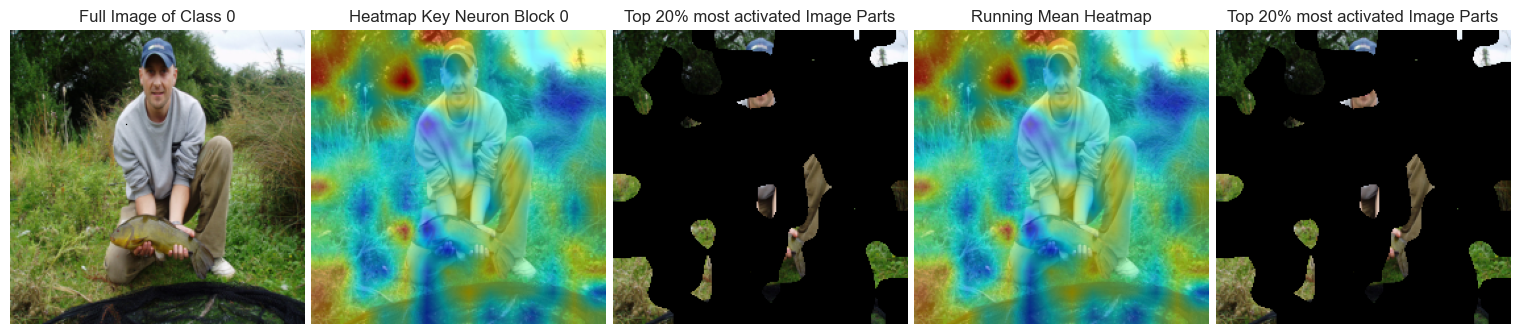

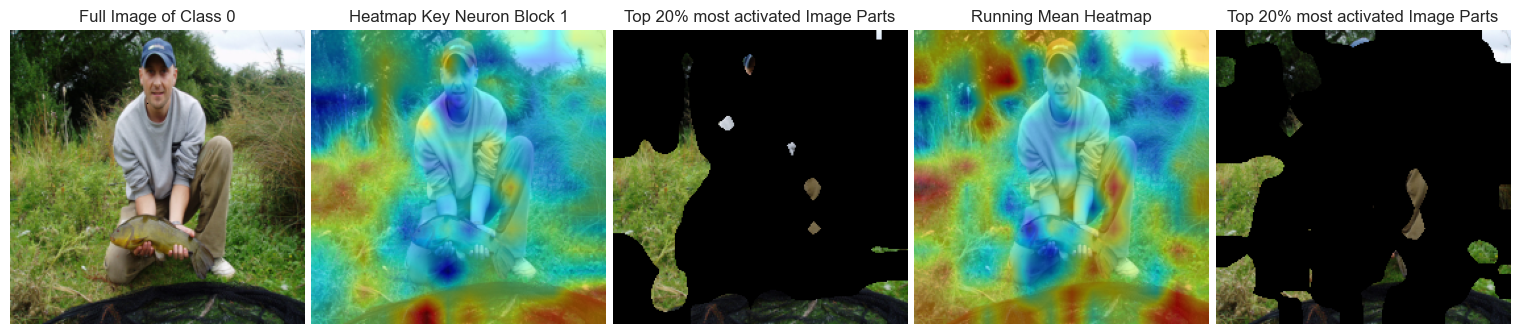

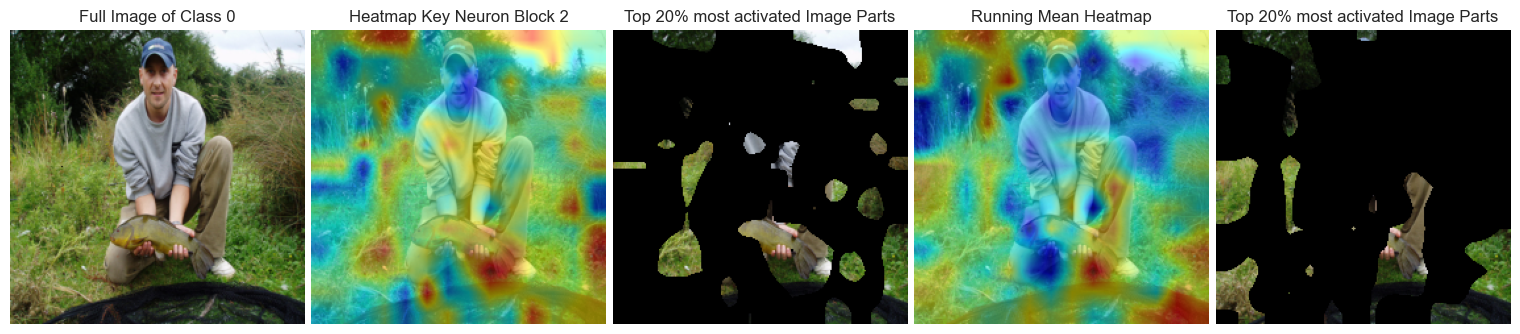

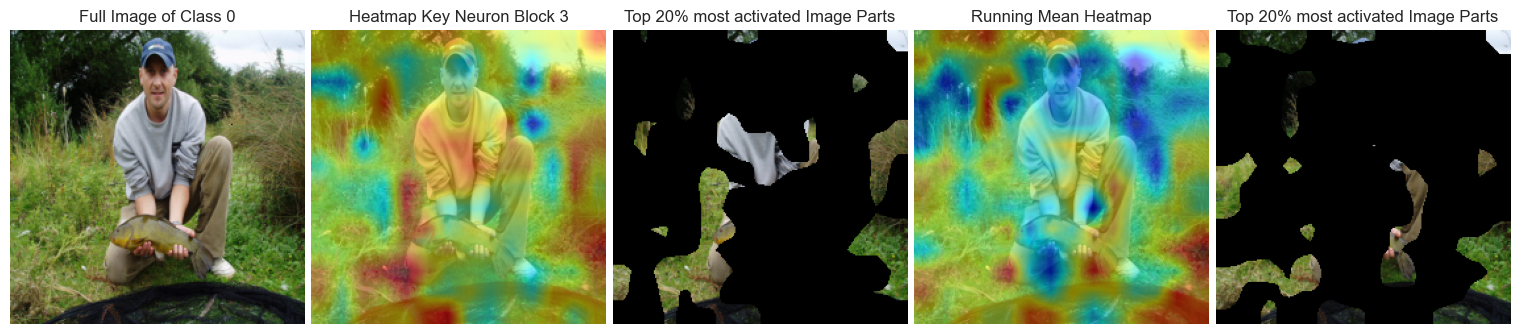

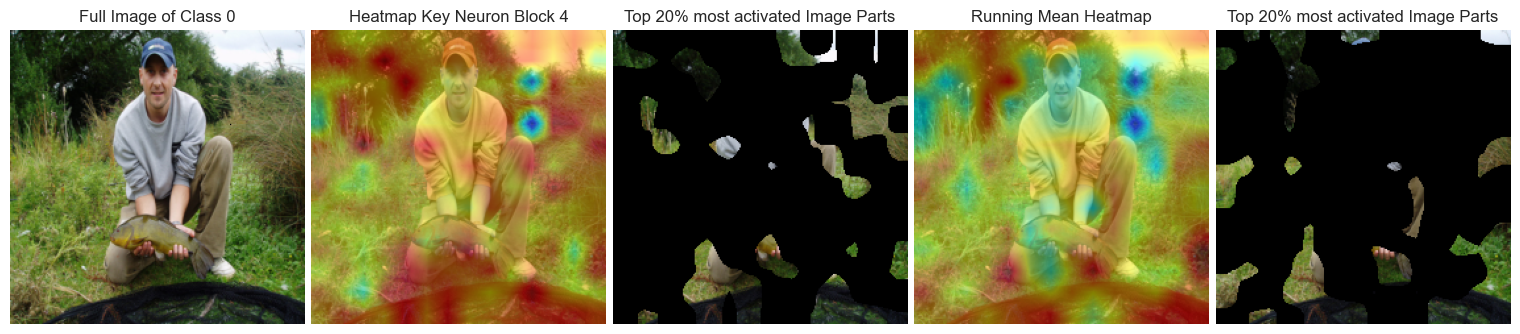

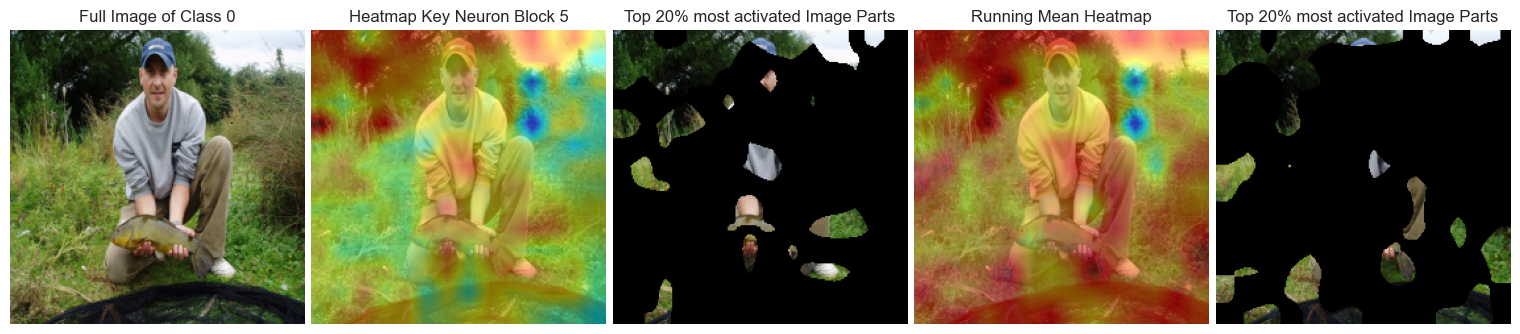

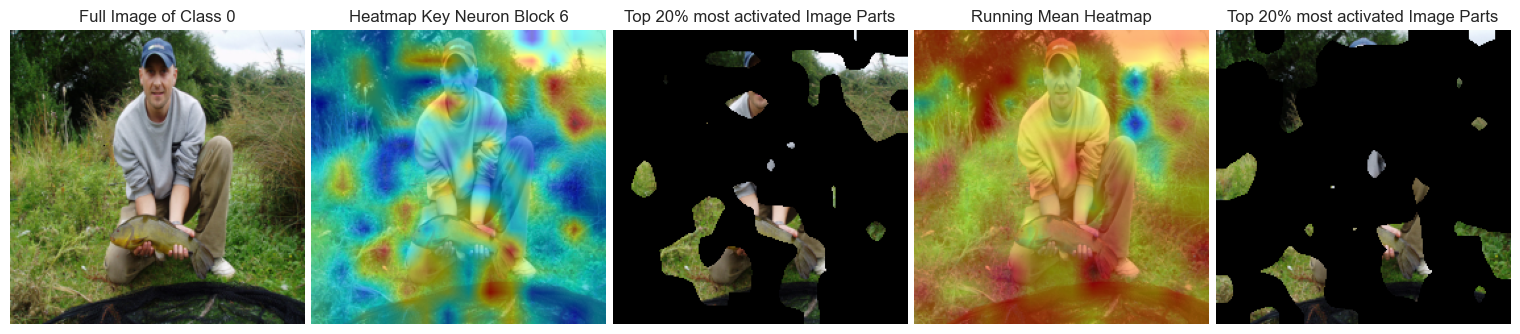

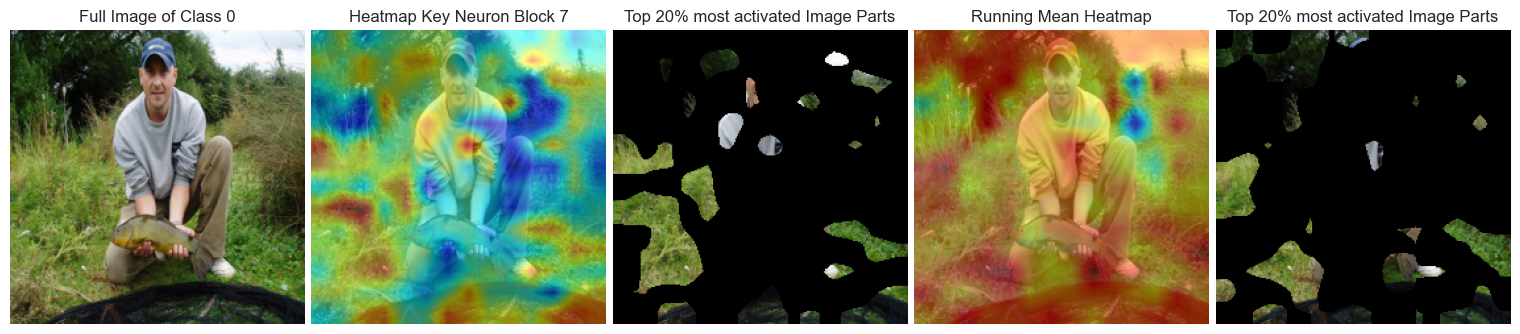

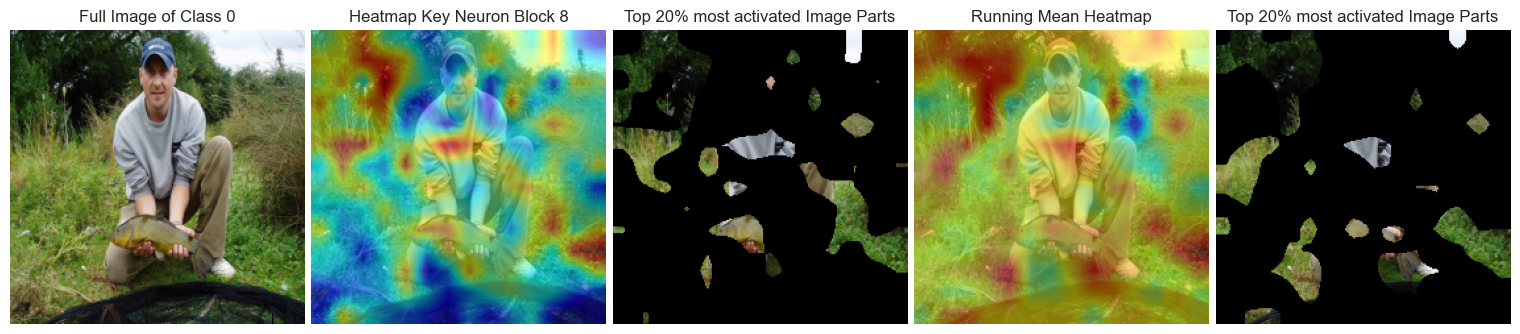

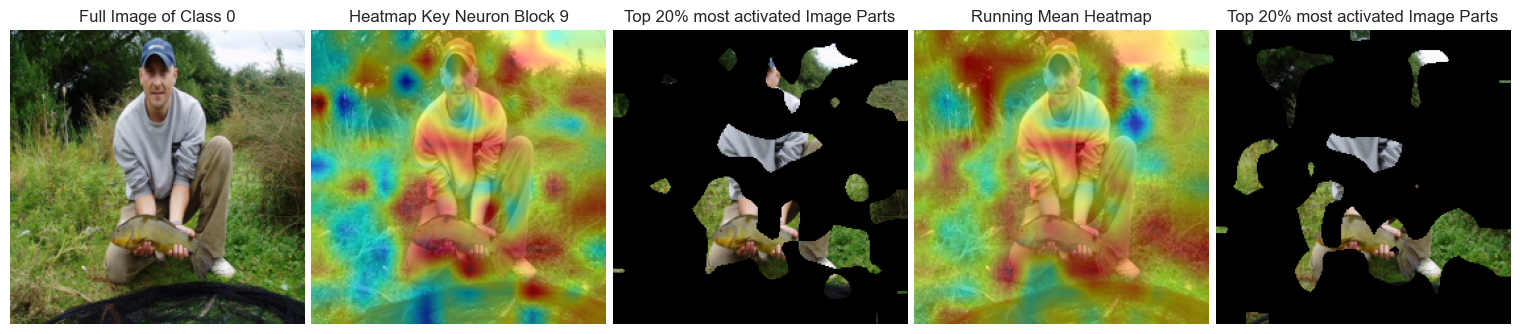

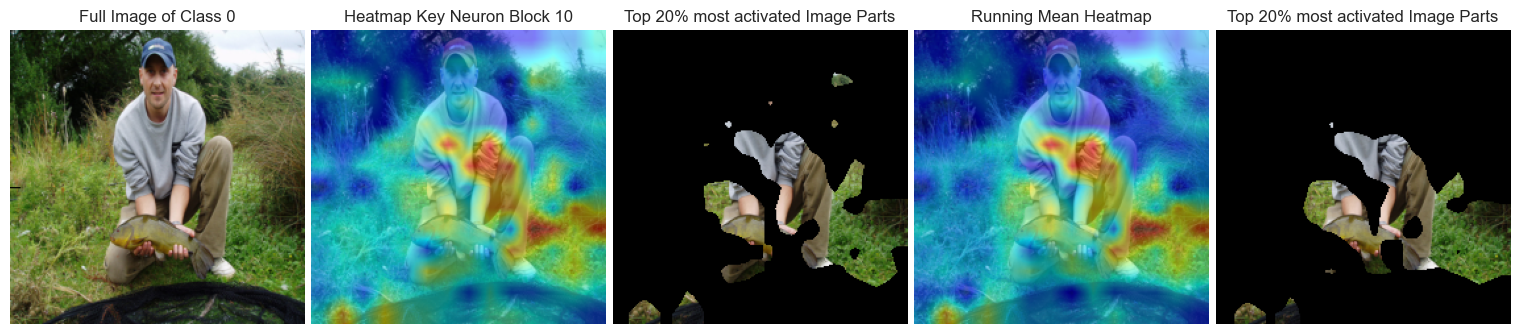

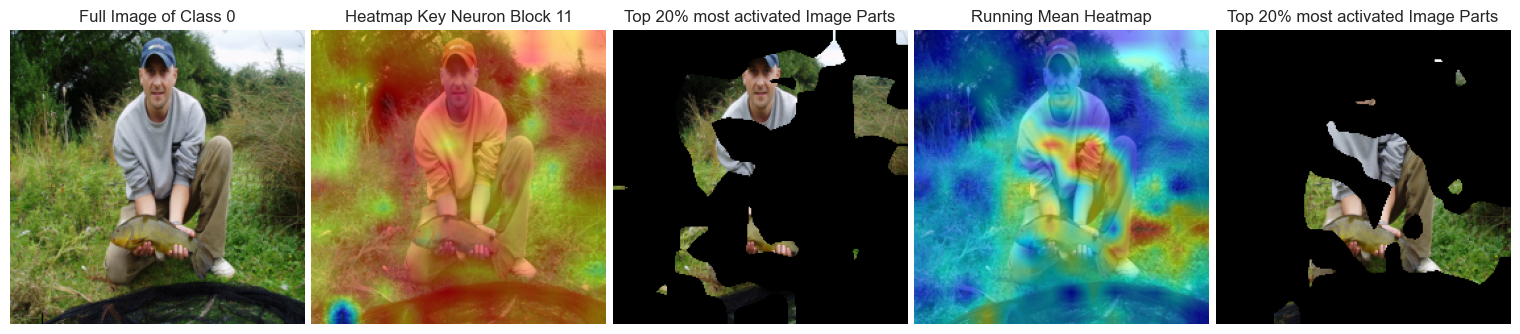

In [229]:
img_to_examine = imgs[3]
#imgs = [33]
running_mean = [torch.ones(196)]

i = 0

for key,value in features.items():
    if 'fc1' in key:
        continue
    #key: layer id
    #value: output of hidden embedding after layer
    no_cls = value[:, 1:, :]
    most_interesting_parts_img = no_cls @ topk_key_vectors_mean[c]
    
    
    running_mean.append(most_interesting_parts_img[0])
    
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 10))
    
    plot0 = apply_binary_mask(most_interesting_parts_img[0], img_to_examine, percentile=0)
    axes[0].imshow(plot0)
    axes[0].set_title(f'Full Image of Class {c}')
    axes[0].axis('off')

    # Generate and plot the heatmap on the second subplot
    plot1 = apply_heatmap(most_interesting_parts_img[0], img_to_examine)
    axes[1].imshow(plot1)
    axes[1].set_title(f'Heatmap Key Neuron Block {i}')
    axes[1].axis('off')

    # Generate and plot the binary mask again on the third subplot (or use a different mask if intended)
    plot2 = apply_binary_mask(most_interesting_parts_img[0], img_to_examine)
    axes[2].imshow(plot2)
    axes[2].set_title(f'Top 20% most activated Image Parts')
    axes[2].axis('off')
    
    # Generate and plot the heatmap on the second subplot
    plot3 = apply_heatmap(torch.mean(torch.stack(running_mean), dim=0), img_to_examine)
    axes[3].imshow(plot3)
    axes[3].set_title(f'Running Mean Heatmap')
    axes[3].axis('off')
    
    # Generate and plot the heatmap on the second subplot
    plot4 = apply_binary_mask(torch.mean(torch.stack(running_mean), dim=0), img_to_examine)
    axes[4].imshow(plot4)
    axes[4].set_title(f'Top 20% most activated Image Parts')
    axes[4].axis('off')
    i+= 1


    

    # Show the plot
    plt.tight_layout(pad=0, w_pad=0.5, h_pad=0)
    #plt.subplots_adjust(wspace=0.5)
    plt.savefig(str(i) + 'top1_class0_activation.png')
    plt.show()
    
    